In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data_parsing = pd.read_excel('data/data_TSUM.xlsx', sheet_name='Data_Parsing')
data_company = pd.read_excel('data/data_TSUM.xlsx', sheet_name='Data_Company')

print(data_parsing.head())
print(data_parsing['producer_color'].value_counts())
display(data_company.head())

       brand Category   producer_id producer_color  price
0  Valentino    Shoes  aaaaa1111_11          black    167
1  Valentino    Shoes  aaaaa1111_12          black    188
2  Valentino    Shoes  aaaaa1111_13          black    184
3  Valentino    Shoes  aaaaa1111_14        bla//ck    196
4  Valentino    Shoes  aaaaa1111_15        bla\\ck    250
~~~red      33
white_~     21
black        9
bla//ck      3
bla\\ck      3
bla__ck      3
bla\\c~k     3
Name: producer_color, dtype: int64


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [45]:
symbol_list = ['_', '-', '~', '\\', '/']
col_list = ['brand', 'Category', 'producer_id', 'producer_color']

for col in col_list:
    for i in data_parsing.index:
        for symbol in symbol_list:
            data_parsing.loc[i, col] = data_parsing.loc[i, col].replace(symbol, '')
            
data_parsing.head()
            

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250


In [52]:
data_parsing = data_parsing.rename(columns={'producer_id': 'item_id'})

merged_data = data_parsing.merge(data_company, on='item_id', how='left')
display(merged_data.head(5))

,brand_x,Category_x,item_id,producer_color,price,brand_y,Category_y,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,black,247
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,black,161
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,black,234
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,black,167
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,black,153


In [56]:
merged_data['price_diff'] = merged_data['current price'] - merged_data['price']
print(merged_data['brand_x'].value_counts())

Valentino       25
Brioni          25
Stone Island    25
Name: brand_x, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1b02dd59130>,
 'caps': [<matplotlib.lines.Line2D at 0x1b02d9fc9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b02dd597f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b02eb93a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b02e2e6c10>],
 'means': []}

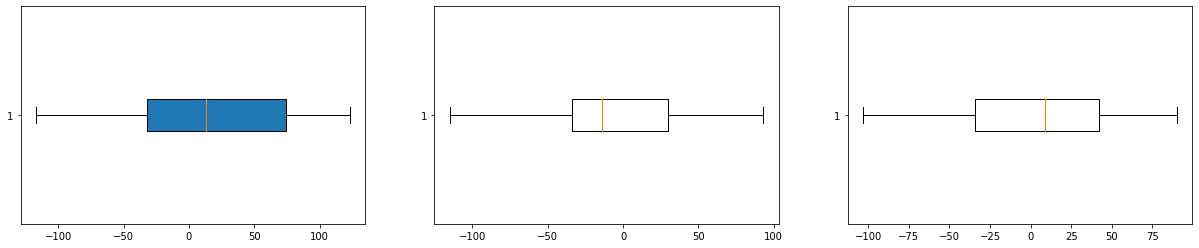

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 4))

axes[0].boxplot(merged_data[merged_data['brand_x'] == 'Valentino']['price_diff'], vert=0, patch_artist=True)
axes[1].boxplot(merged_data[merged_data['brand_x'] == 'Brioni']['price_diff'], vert=0)
axes[2].boxplot(merged_data[merged_data['brand_x'] == 'Stone Island']['price_diff'], vert=0)

In [82]:
writer = pd.ExcelWriter('data/output.xlsx')
merged_data.to_excel(writer)
writer.save()

